In [24]:
import matplotlib.pyplot as plt
from nilearn._utils.data_gen import generate_group_sparse_gaussian_graphs
from nilearn import plotting
from nilearn.connectome import GroupSparseCovarianceCV


# Generate synthetic data

In [21]:
n_subjects = 20  # number of subjects
n_displayed = 3  # number of subjects displayed
subjects, precisions, topology = generate_group_sparse_gaussian_graphs(
    n_subjects=n_subjects, n_features=10, min_n_samples=40, max_n_samples=50,
    density=0.1)

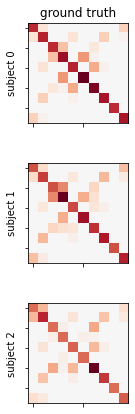

In [26]:
fig = plt.figure(figsize=(10, 7))
plt.subplots_adjust(hspace=0.4)
for n in range(n_displayed):
    ax = plt.subplot(n_displayed, 4, 4 * n + 1)
    max_precision = precisions[n].max()
    plotting.plot_matrix(precisions[n], vmin=-max_precision,
                         vmax=max_precision, axes=ax, colorbar=False)

    if n == 0:
        plt.title("ground truth")
    plt.ylabel("subject %d" % n)

In [23]:
subjects[8].shape

(43, 10)

In [ ]:
gsc = GroupSparseCovarianceCV(max_iter=50, verbose=1)
gsc.fit(subjects)

for n in range(n_displayed):
    ax = plt.subplot(n_displayed, 4, 4 * n + 2)
    max_precision = gsc.precisions_[..., n].max()
    plotting.plot_matrix(gsc.precisions_[..., n], axes=ax, vmin=-max_precision,
                         vmax=max_precision, colorbar=False)
    if n == 0:
        plt.title("group-sparse\n$\\alpha=%.2f$" % gsc.alpha_)


# Fit one graph lasso per subject
try:
    from sklearn.covariance import GraphicalLassoCV
except ImportError:
    # for Scitkit-Learn < v0.20.0
    from sklearn.covariance import GraphLassoCV as GraphicalLassoCV

gl = GraphicalLassoCV(verbose=1)

for n, subject in enumerate(subjects[:n_displayed]):
    gl.fit(subject)

    ax = plt.subplot(n_displayed, 4, 4 * n + 3)
    max_precision = gl.precision_.max()
    plotting.plot_matrix(gl.precision_, axes=ax, vmin=-max_precision,
                         vmax=max_precision, colorbar=False)
    if n == 0:
        plt.title("graph lasso")
    plt.ylabel("$\\alpha=%.2f$" % gl.alpha_)


# Fit one graph lasso for all subjects at once
import numpy as np
gl.fit(np.concatenate(subjects))

ax = plt.subplot(n_displayed, 4, 4)
max_precision = gl.precision_.max()
plotting.plot_matrix(gl.precision_, axes=ax, vmin=-max_precision,
                     vmax=max_precision, colorbar=False)
plt.title("graph lasso, all subjects\n$\\alpha=%.2f$" % gl.alpha_)

show()